# Time Series example 

In [1]:
import numpy as np 
import pandas as pd 
import seaborn as sns 
import matplotlib.pyplot as plt 
import statsmodels.api as sm 
import datetime 
from dateutil.relativedelta import relativedelta 

# get data 

In [49]:
data=pd.read_csv('weather_data.csv')
data.head()

,month,temperature,humidity,rainfall
0,2009-01,27.0,83,405.0
1,2009-02,26.4,78,653.0
2,2009-03,27.9,81,121.0
3,2009-04,27.6,86,141.0
4,2009-05,27.7,82,360.0


In [3]:
data['month'].min()

'2009-01'

In [4]:
data['month'].max()

'2018-12'

In [7]:
data['month']=pd.to_datetime(data['month'])

In [8]:
new_df=data[data['month']>'2015-12-01'] # 3 years only of data (similar to bacardi) 

# options for models 

- classic time series - statistical model 
- machine learning model 
- neural network /reinforcement / deep model 

In [11]:
sns.set(rc={'figure.figsize':(20,8)})
sns.set_style('whitegrid')

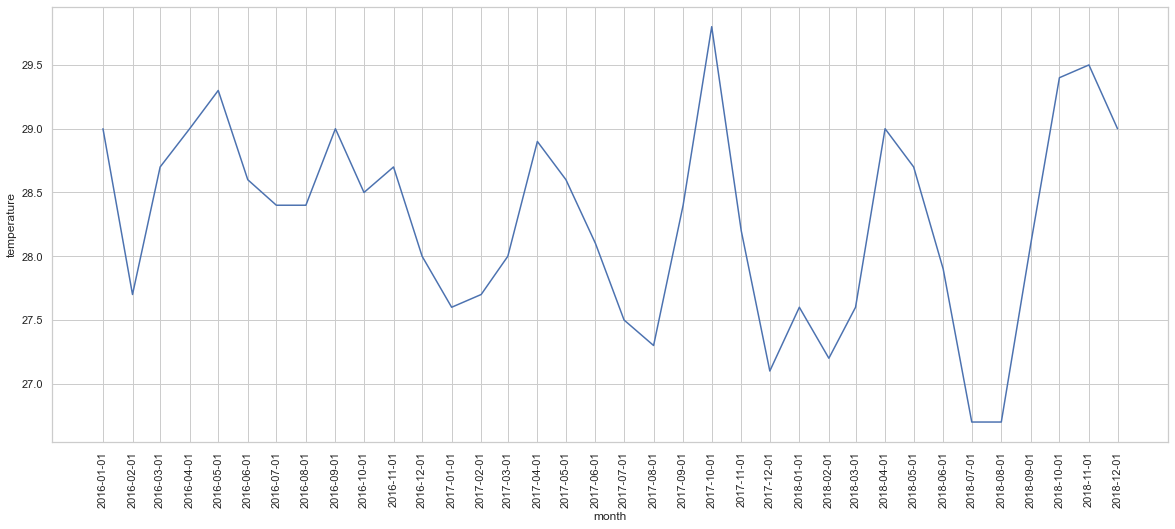

In [12]:
ax=sns.lineplot(x='month',y='temperature',data=new_df)
plt.xticks(new_df['month'])
ax.tick_params(axis='x',rotation=90);

## rolling averages 

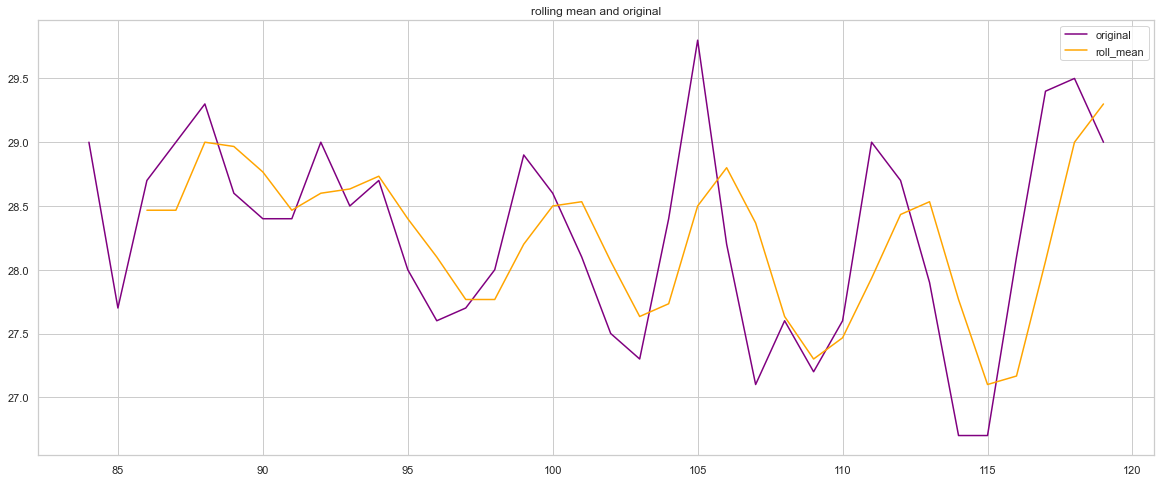

In [15]:
rolling_mean=new_df['temperature'].rolling(window=3).mean()
rolling_std=new_df['temperature'].rolling(window=3).std()
original=plt.plot(new_df['temperature'],color='purple',label='original')
mean=plt.plot(rolling_mean,color='orange',label='roll_mean')
#std=plt.plot(rolling_std,color='black',label='roll_std')
plt.legend(loc='best')
plt.title('rolling mean and original')
plt.show();

## exponential smoothing 

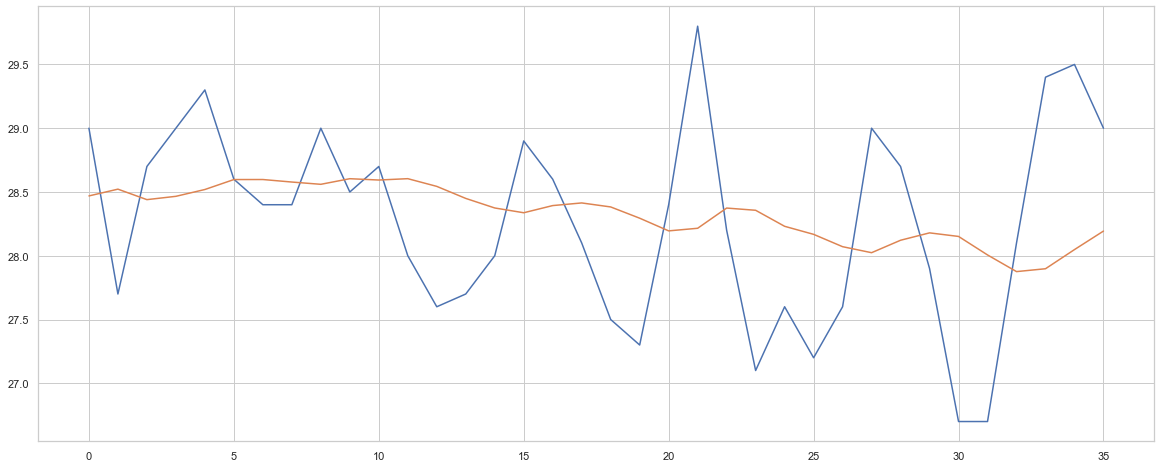

In [18]:
from statsmodels.tsa.api import SimpleExpSmoothing
es=SimpleExpSmoothing(new_df.temperature.values)
es.fit(smoothing_level=0.1)
plt.plot(new_df.temperature.values)
plt.plot(es.predict(es.params,start=0,end=None))
plt.show();

## Seasonality 

 decompose the time series 
- seasons 
- general trend 
- whats left (residual )

In [22]:
new_df.head(1)

,month,temperature,humidity,rainfall
month,,,,
2016-01-01,2016-01-01,29.0,79,167.1


In [21]:
#moving month to index 
new_df.index=pd.DatetimeIndex(new_df['month'])

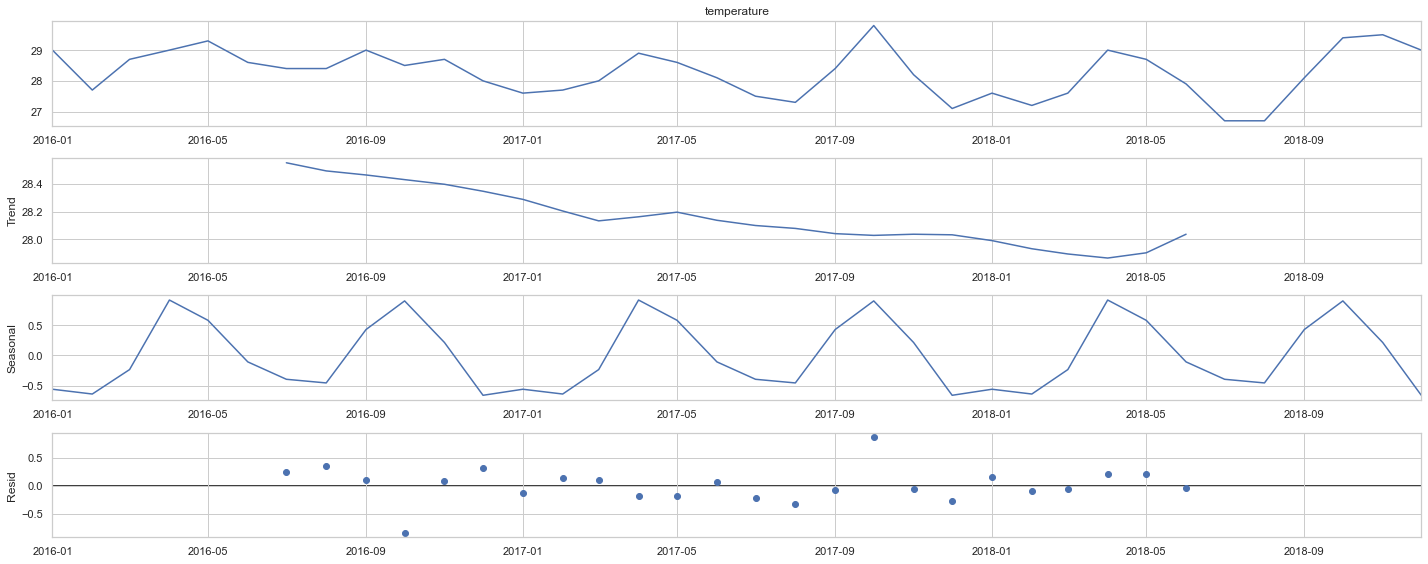

In [23]:
decomp=sm.tsa.seasonal_decompose(new_df['temperature'])
decomp.plot()
plt.show();

# ARIMA 

- AR auto regressive model 

- I integrated - we dont use the values, we use the difference 

- MA  moving average model

In [25]:
# ARIMA (p,d,q) - automated (pyramid) autoarima 
# lets take just one metric 
selected=new_df['temperature']

In [26]:
import warnings 
warnings.filterwarnings('ignore')

In [27]:
from statsmodels.tsa.arima.model import ARIMA
model=ARIMA(selected, order=(2,0,5))

In [28]:
model_fit1=model.fit()
new_df['forecast_arima']=model_fit1.predict(len(new_df['temperature'])-20,len(new_df['temperature'])-1)

In [29]:
new_df

,month,temperature,humidity,rainfall,forecast_arima
month,,,,,
2016-01-01,2016-01-01,29.0,79,167.1,NaN
2016-02-01,2016-02-01,27.7,84,289.6,NaN
2016-03-01,2016-03-01,28.7,82,251.6,NaN
2016-04-01,2016-04-01,29.0,80,235.1,NaN
2016-05-01,2016-05-01,29.3,79,392.8,NaN
2016-06-01,2016-06-01,28.6,80,174.0,NaN
2016-07-01,2016-07-01,28.4,80,258.4,NaN
2016-08-01,2016-08-01,28.4,75,100.7,NaN
2016-09-01,2016-09-01,29.0,74,120.8,NaN


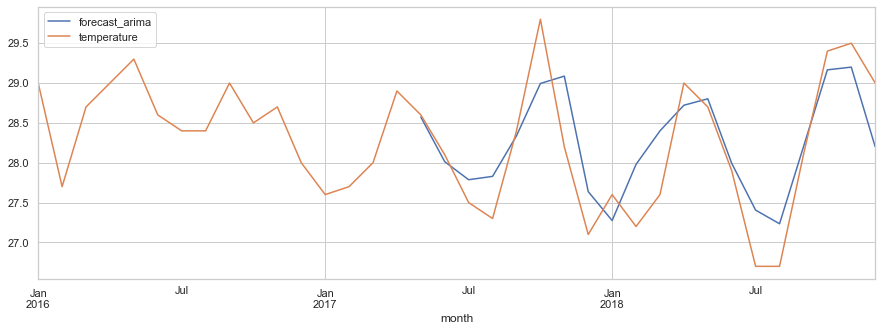

In [30]:
new_df[['forecast_arima','temperature']].plot(figsize=(15,5));

# into the future 

In [32]:
new_df.max()

month             2018-12-01 00:00:00
temperature                      29.8
humidity                           84
rainfall                        528.5
forecast_arima              29.199327
dtype: object

In [41]:
new_df

,month,temperature,humidity,rainfall,forecast_arima
month,,,,,
2016-01-01,2016-01-01,29.0,79,167.1,NaN
2016-02-01,2016-02-01,27.7,84,289.6,NaN
2016-03-01,2016-03-01,28.7,82,251.6,NaN
2016-04-01,2016-04-01,29.0,80,235.1,NaN
2016-05-01,2016-05-01,29.3,79,392.8,NaN
2016-06-01,2016-06-01,28.6,80,174.0,NaN
2016-07-01,2016-07-01,28.4,80,258.4,NaN
2016-08-01,2016-08-01,28.4,75,100.7,NaN
2016-09-01,2016-09-01,29.0,74,120.8,NaN


In [33]:
start=datetime.datetime.strptime('2019-01-01','%Y-%m-%d')
date_list=[start+relativedelta(months=x) for x in range(0,12)]
future=pd.DataFrame(index=date_list,columns=new_df.columns)

In [42]:
forecast_df=pd.concat([new_df,future],axis=0)

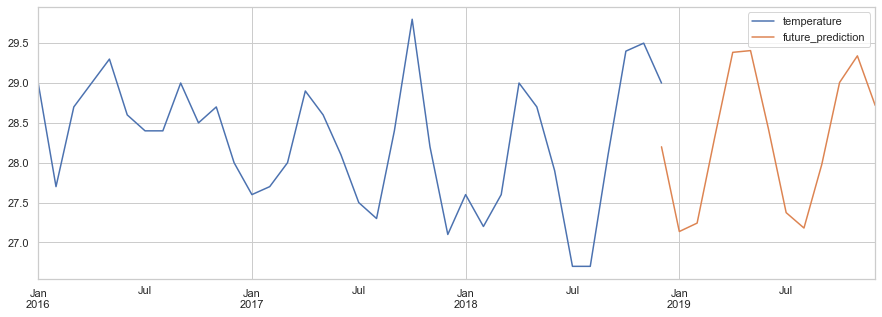

In [47]:
forecast_df['future_prediction']=model_fit1.predict(start=35,end=47,dynamic=True)
forecast_df[['temperature','future_prediction']].plot(figsize=(15,5))
plt.grid(True);

In [ ]:
# parameters 

p - the number of lag observations included in model 
no of prev data points you want to take into account 
partial autocorrelation plot pacf 

d degree of differencing - if your data is seasonal - we make it stationary - mean does not change 
diff() 1 diff().diff() 2 diff().diff().diff() 3

adfuller - critical value | p value 
- decomposed seasonal version of time series 

q size of moving average window - how big is your season 
auto correlation plot acf 

# machine learning 

### feature engineering 

date - year and month - extract year extract month 
public holidays - weeks running up to public holidays 
christmas / summer bbq season 
serve cold / serve at room temp 
low high alc 
expensive cheap 
no of resellers 
no of similar products on market at that time 
poopularity on google trends 
lockdown time or not 
bars closed or not - country 

In [50]:
df_2=data[data['month']>'2015-12-01']

In [51]:
df_2['monthofyear']=pd.DatetimeIndex(df_2['month']).month
df_2['year']=pd.DatetimeIndex(df_2['month']).year

In [53]:
X=df_2.drop(['temperature','month'],axis=1)
y=df_2['temperature']

In [54]:
from sklearn.linear_model import LinearRegression

In [55]:
my_lr=LinearRegression()
my_lr.fit(X,y)
preds=my_lr.predict(X)

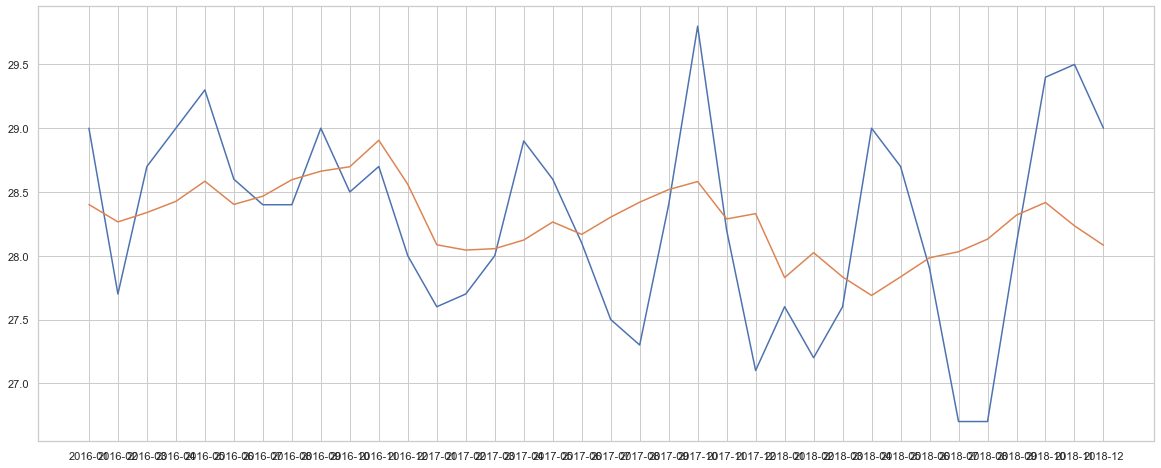

In [57]:
plt.plot(df_2.month.values,df_2.temperature.values)
plt.plot(df_2.month.values,preds);